**Exercice 4**

Dans cet exercice, la paramétrisation n'est pas une paramétrisation polynômiale. Mais on peut transformer les systèmes en systèmes polynomiaux en remarquant que $(t,s) \in \mathbb{R}^2$ est tel que $t^2 + s^2 = 1$ si et seulement si il existe $u \in \mathbb{R}$ tel que $t = \cos(u)$, $s = \sin(u)$. Ainsi on peut remplacer $\cos u$ par $t$, $\sin u$ par $s$ et rajouter l'équation $t^2 + s^2 = 1$. Finalement, pour $\cos(nu)$ et $\sin(nu)$, avec $n \geq 1$, on sait les exprimer comme un polynôme de $\cos u$ et $\sin u$, donc il suffit aussi de rajouter des variables $t_n$ et $s_n$, et les équations polynômiales associées en fonction de $t$ et $s$.

**1.**

In [41]:
A.<cu, ct, su, st, x, y, z> = PolynomialRing(QQ, order = 'lex')
I = A.ideal(cu^2 + su^2 - 1, ct^2 + st^2 - 1, x - (2 + cu)*ct, y - (2 + cu)*st, z - su)
G = I.groebner_basis()
f = G[-1]
print(f)

x^4 + 2*x^2*y^2 + 2*x^2*z^2 - 10*x^2 + y^4 + 2*y^2*z^2 - 10*y^2 + z^4 + 6*z^2 + 9


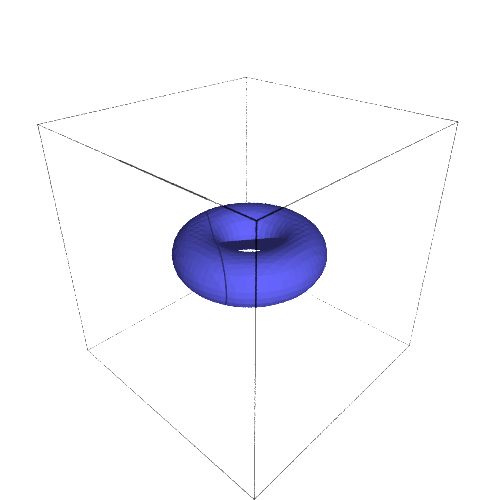

In [42]:
B.<x,y,z> = QQ[]
implicit_plot3d(B(f), (x, -5, 5), (y, -5, 5), (z, -5, 5), viewer = "tachyon")

**2.**

In [43]:
var('s')
[trig(n*s).simplify_trig() for n in [2,3] for trig in [cos, sin]]

[2*cos(s)^2 - 1,
 2*cos(s)*sin(s),
 4*cos(s)^3 - 3*cos(s),
 (4*cos(s)^2 - 1)*sin(s)]

In [44]:
A.<c2s, s2s, c3s, s3s, cs, ss, x, y, z> = PolynomialRing(QQ, order = 'lex')
I = A.ideal(c2s - 2*cs^2 + 1, s2s - 2*cs*ss, c3s - 4*cs^3 + 3*cs, s3s - (4*cs^2 - 1)*ss, ss^2 +  cs^2 -1, x - (2 + c2s)*c3s, y - (2 + c2s)*s3s, z - s2s)
G = I.elimination_ideal([c2s, s2s, c3s, s3s, cs, ss]).gens()
Gbis = [B(g) for g in G]
print(Gbis)

[16*z^10 + 72*z^8 + 64*y^2*z^4 + 9*z^6 + 4*y^4 - 76*y^2*z^2 - 162*z^4 - 4*y^2 + 81*z^2, 16*x*z^7 + 64*y*z^6 - 96*x*z^5 + 8*y^3*z^2 - 88*y*z^4 + 67*x*z^3 - 2*y^3 - 6*y*z^2 - 3*x*z + 2*y, -16*z^9 - 80*z^7 + 8*x*y*z^4 - 32*y^2*z^3 - 51*z^5 - 42*x*y*z^2 + 24*y^2*z + 126*z^3 + 2*x*y - 27*z, -8*x*z^6 - 36*y*z^5 + 62*x*z^4 - 4*y^3*z + 59*y*z^3 + 2*x*y^2 - 42*x*z^2 + y*z, -144*z^8 - 728*z^6 + 72*x*y*z^3 - 288*y^2*z^2 - 505*z^4 - 374*x*y*z + 25*x^2 + 225*y^2 + 1074*z^2 - 225]


**3.** Par définition, la surface correspond à l'ensemble algébrique $V(G)$, et la courbe à l'ensemble algébrique $V(G_{bis})$. Ainsi pour vérifier que la courbe est incluse dans la surface, il suffit de vérifier que $G = \{f\} \subseteq \langle G_{bis} \rangle$ :

In [45]:
print(f in B.ideal(Gbis))

True


Graphiquement, cela donne :

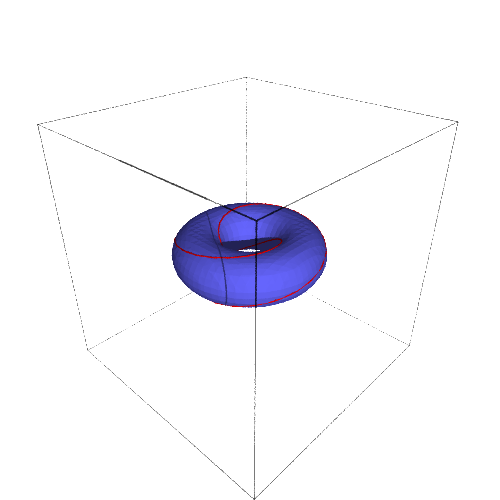

In [46]:
parametric_plot3d(((2 + cos(2*s))*cos(3*s), (2 + cos(2*s))*sin(3*s), sin(2*s)), (0,2*pi), viewer = 'tachyon', color = 'red') + implicit_plot3d(B(f), (x, -5, 5), (y, -5, 5), (z, -5, 5), viewer = "tachyon")